In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3, random_state=42)

In [4]:
X

array([[-0.16711808,  0.14671369],
       [-0.02090159,  0.11732738],
       [ 0.15041891,  0.364961  ],
       ...,
       [ 0.30263547, -0.75427585],
       [ 0.38193545,  0.43004165],
       [ 0.07736831, -0.8612842 ]])

In [5]:
y

array([-8.58360648e+00, -3.85693552e+00,  1.13055635e+01,  1.82456767e+01,
       -7.88116908e+00, -3.53502722e+01, -4.16119853e+01, -6.06685136e+01,
        6.40593596e-01, -5.54960535e+01,  3.81242108e+01, -6.00955690e+01,
       -2.12775840e+01, -3.00886583e+01,  3.21957138e+01,  8.19831490e+00,
       -1.21934033e+01, -3.88159545e+01, -1.86588285e+01,  7.94554336e+01,
        2.58884764e+01, -4.19296465e+01, -3.73840117e+01, -4.71212909e+01,
       -5.06334209e+01, -3.78431781e+01,  5.85072616e+00,  7.04811608e+01,
        8.88902197e+01, -1.39862153e+01, -2.45949909e+01, -6.03693589e+00,
        1.84121155e+01,  2.35783851e+01, -9.03291187e+00, -4.16848331e+00,
        4.75454044e+01, -3.30411777e+01,  4.82834151e+01, -4.54365318e+01,
       -4.20693869e+01, -1.20295639e+01,  5.35861098e+01,  3.31883897e+01,
        3.99413518e+00, -2.38261357e+01,  1.03155182e+01,  1.27454640e+01,
       -1.09637842e+01,  2.16798615e+01,  6.80112450e+01,  1.94995177e+01,
       -6.19744835e+01,  

<Axes: xlabel='0', ylabel='1'>

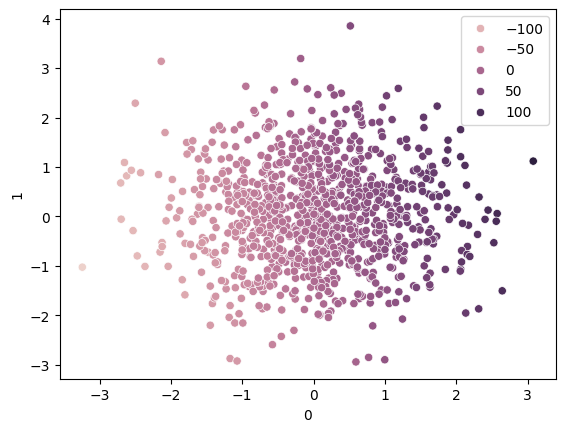

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [11]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr

SVR(kernel='linear')

In [12]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[40.67355144,  6.45066006]])

In [14]:
y_pred = svr.predict(X_test)
y_pred

array([ 42.96963558,  -1.45145364, -23.19802704, -15.56465108,
        42.25944939,  15.48289955,  63.69638289, -38.6414356 ,
       -83.05651232,  -8.87809923,  23.61424186,  -9.01639829,
       -75.45543331,  52.93701881,  13.49393934,   5.83538669,
       -58.69290732,  24.78263821, -27.67026874,  18.9073826 ,
        21.76171699,   9.39728408, -16.59837675, -40.97209752,
       -40.98407728,  26.77570768, -60.87339848,  53.4911877 ,
       -22.55369443,  74.38169692, -73.5973073 ,  29.35089512,
       -62.37984369,  -5.97655525, -45.72227576,  -3.8811715 ,
        21.7012475 ,  38.43814764,   7.48461073, -47.61328579,
       100.38347735,  32.06838332,  40.45744999, -73.71316344,
        21.06731539,  25.22124357, -35.9743433 ,  -4.24685245,
        59.11527348,  69.25515072,  59.39214888,  78.50216716,
       -71.08900943, -33.51419523, -46.28682176, -20.18488344,
       -40.48381754,  38.64470302,  93.04820814,  30.61778895,
        39.71992625,   0.4834275 , -24.09339985,  -2.54

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)    
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8.712178201475238
R^2 Score: 0.9944077044171026


In [18]:
#hyperparameter tuning
params = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 0.2, 2, 3,50,100],
    'epsilon': [0.01, 0.1, 0.5, 0.2, 0.3],
    'gamma': [0.1, 0.2, 1, 2, 0.001, 0.003]
}

In [19]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVR(), params, cv=5,verbose =3)

In [20]:
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.979 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.2, kernel=linear;, score=0.982 total time=   0.0s
[CV 1/5] END C=0

In [21]:
grid_search.best_params_

{'C': 100, 'epsilon': 0.5, 'gamma': 0.1, 'kernel': 'linear'}

In [22]:
grid_search.best_score_

np.float64(0.9944318758536875)

In [23]:
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
r2_score(y_test, y_pred_final)

0.99426927626805